# Visualizations

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import re

from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
plt.style.use("dark_background")
plt.rcParams.update({
    "font.family": 'STIXGeneral',
})

In [3]:
path = os.getcwd()[:-7]

In [4]:
deepface_results = pd.read_csv(path + "results/DeepFace_results.csv", usecols=['Model', 'Confusion Matrix'])

In [5]:
deepface_results

,Model,Confusion Matrix
0,Facenet,"[[321, 163], [5, 468]]"
1,Facenet512,"[[247, 237], [0, 473]]"
2,OpenFace,"[[13, 471], [1, 472]]"
3,DeepID,"[[40, 444], [8, 465]]"
4,SFace,"[[351, 133], [2, 471]]"
5,GhostFaceNet,"[[340, 144], [3, 470]]"


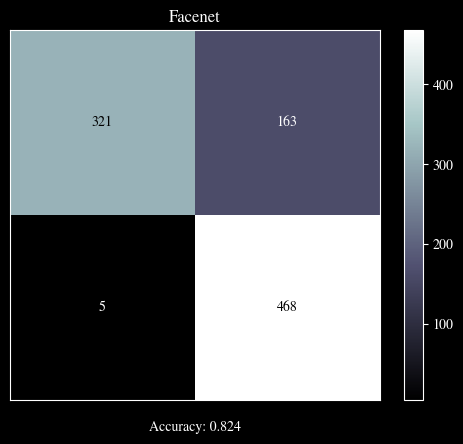

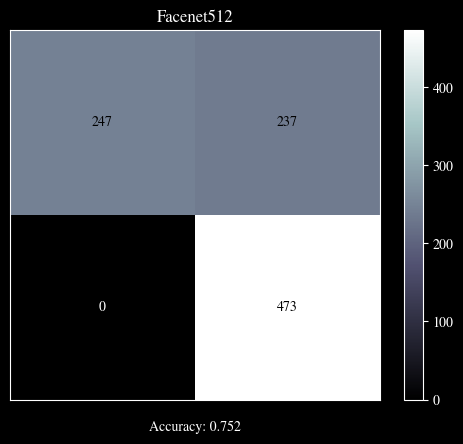

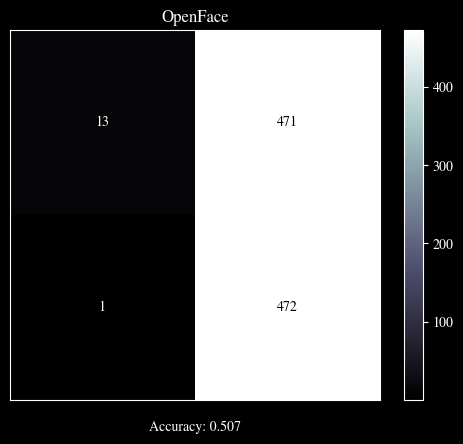

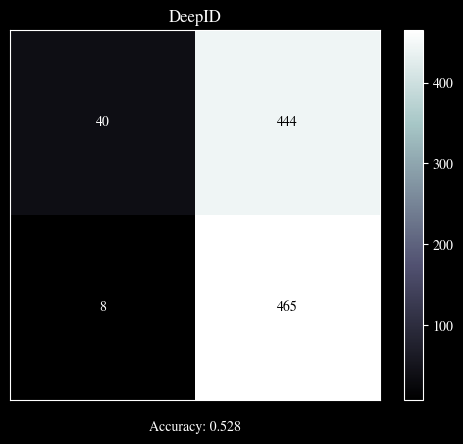

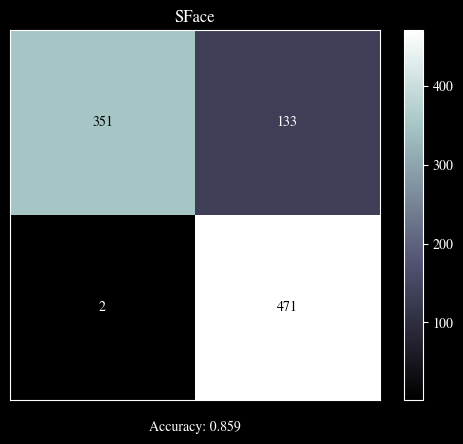

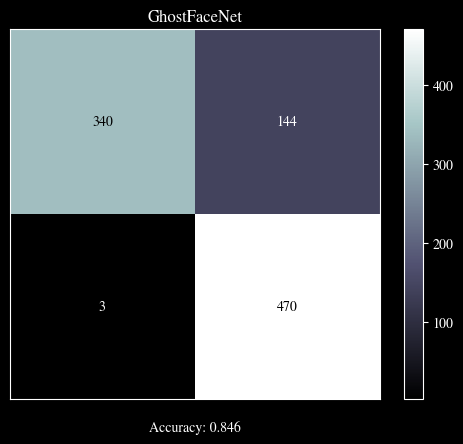

In [6]:
for _ , m in deepface_results.iterrows():
    cm = m["Confusion Matrix"]
    cm = np.asarray([int(item) for item in re.sub(r'[,\[\]]', '', cm).split(" ")])
    cm = cm.reshape(2, 2)
    
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='bone')
    plt.title(m.Model)
    plt.xlabel(f"\nAccuracy: {(cm[0,0] + cm[1,1]) / cm.sum():.3f}")
    plt.ylabel("")
    plt.xticks([])
    plt.yticks([])
    plt.savefig(f"{m.Model}_cm.png")


In [7]:
csim_result = pd.read_csv(path + "results/CosineSimilarity_results.csv", usecols=['Model', 'Confusion Matrix'])

In [9]:
csim_result

,Model,Confusion Matrix
0,Cosine Similarity,"[[316, 184], [178, 322]]"


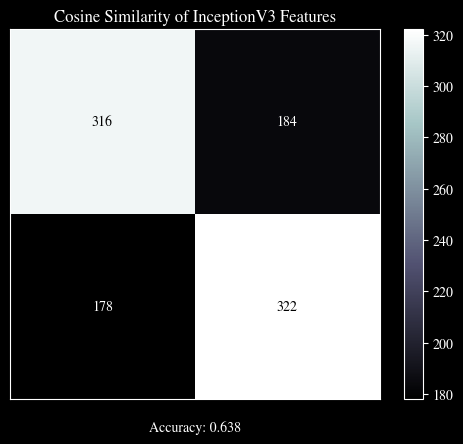

In [13]:
cm = np.asarray([int(item) for item in re.sub(r'[,\[\]]', '', csim_result["Confusion Matrix"].loc[0]).split(" ")])
cm = cm.reshape(2, 2)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='bone')
plt.title("Cosine Similarity of InceptionV3 Features")
plt.xlabel(f"\nAccuracy: {(cm[0,0] + cm[1,1]) / cm.sum():.3f}")
plt.ylabel("")
plt.xticks([])
plt.yticks([])
plt.savefig(f"csim_cm.png")